### **Note:** 
Before executing the cell, replace the path "*drive/MyDrive/Structure-From-Motion-Accurate-Optical-Flow-vs-Active-Vision*"
with your path to the project.

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

%cd drive/MyDrive/Structure-From-Motion-Accurate-Optical-Flow-vs-Active-Vision

# MMflow installation
!pip3 install -U openmim
!mim install mmcv-full

!pip install mmflow
!pip install -e .


#ROS installation
!sudo sh -c 'echo "deb http://packages.ros.org/ros/ubuntu $(lsb_release -sc) main" > /etc/apt/sources.list.d/ros-latest.list'
!sudo apt-key adv --keyserver 'hkp://keyserver.ubuntu.com:80' --recv-key C1CF6E31E6BADE8868B172B4F42ED6FBAB17C654
!sudo apt update
!sudo apt install ros-noetic-desktop-full
!pip install --extra-index-url https://rospypi.github.io/simple/ rospy
!pip install --extra-index-url https://rospypi.github.io/simple/ tf2-ros
!pip install bagpy
!pip install cvbridge3




/content/drive/MyDrive/Structure-From-Motion-Accurate-Optical-Flow-vs-Active-Vision
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/Structure-From-Motion-Accurate-Optical-Flow-vs-Active-Vision
  Preparing metadata (setup.py) ... done
ERROR: No .egg-info directory found in /tmp/pip-pip-egg-info-nnjvt4zq
Executing: /tmp/apt-key-gpghome.tCQQlmLLjP/gpg.1.sh --keyserver hkp://keyserver.ubuntu.com:80 --recv-key C1CF6E31E6BADE8868B172B4F42ED6FBAB17C654
gpg: key F42ED6FBAB17C654: "Open Robotics <info@osrfoundation.org>" not ch

In [ ]:
#%cd drive/MyDrive/Structure-From-Motion-Accurate-Optical-Flow-vs-Active-Vision

import rospy

import torch
#import torchvision
torch.cuda.is_available = lambda: True
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from mmflow.apis import init_model, inference_model
from mmflow.datasets import visualize_flow, write_flow

import time
import subprocess
import importlib


from src.utils.utils_rosbag import *
from src.utils.utils_opticflow import *
from src.utils.utils_detection import *
from src.utils.utils_plot import *
from src.utils.utils_math import *
'''
importlib.reload(src.utils.utils_rosbag)
importlib.reload(src.utils.utils_opticflow)
importlib.reload(src.utils.utils_detection)
importlib.reload(src.utils.utils_plot)
importlib.reload(src.utils.utils_math)
'''

#start roscore
!printf -- '#!/bin/bash\n' > ros_start.sh
!printf -- 'source /opt/ros/noetic/setup.bash\n' >> ros_start.sh
!printf -- '/opt/ros/noetic/bin/roscore' >> ros_start.sh
!chmod +x ros_start.sh
!cat ros_start.sh

prc = subprocess.Popen([os.getcwd()+"/ros_start.sh"])

/usr/local/lib/python3.8/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


#!/bin/bash
source /opt/ros/noetic/setup.bash
/opt/ros/noetic/bin/roscore

models/configs/pwcnet/pwcnet_ft_4x1_300k_sintel_final_384x768.py
models/checkpoints/pwcnet_ft_4x1_300k_sintel_final_384x768.pth
load checkpoint from local path: models/checkpoints/pwcnet_ft_4x1_300k_sintel_final_384x768.pth
{'trial': 'approxdist_100cm_markersize_270mm_heuristic4gain_0.05_gazelock_2021-10-26-11-58-31', 'gt': 1, 'marker_size': 0.27, 'marker_type': 'straight', 'trial_type': 'gazelock'}
Gazelock trial,straight marker
Trial does not exist
{'trial': 'approxdist_100cm_markersize_270mm_heuristic4gain_0.05_straight_2021-10-26-12-01-55', 'gt': 1, 'marker_size': 0.27, 'marker_type': 'straight', 'trial_type': 'translational'}
Translational trial, straight marker
Trial does not exist
{'trial': 'approxdist_100cm_markersize_270mm_heuristic4gain_0.05_straight_oblique_2021-10-26-12-04-51', 'gt': 1, 'marker_size': 0.27, 'marker_type': 'oblique', 'trial_type': 'translational'}
Translational trial, oblique marker
Trial does not exist
{'trial': 'approxdist_100cm_markersize_270mm_heuristic4

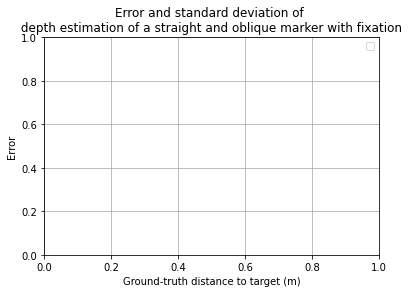

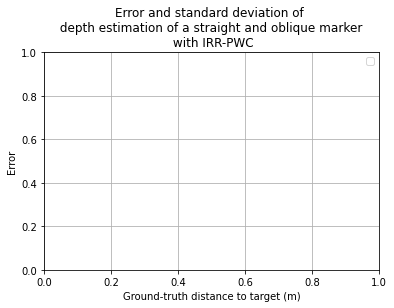

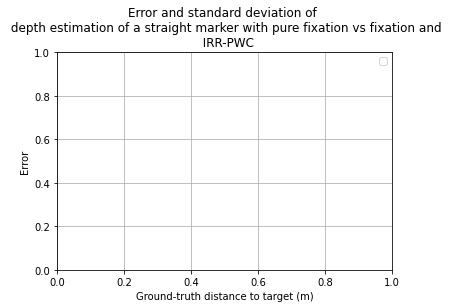

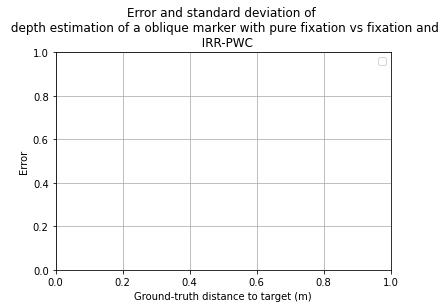

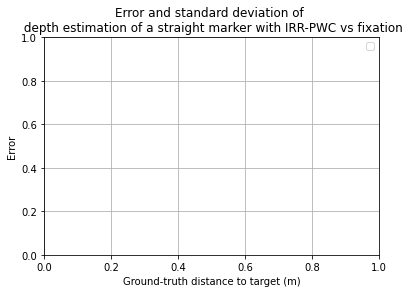

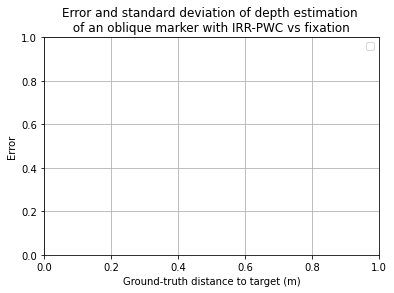

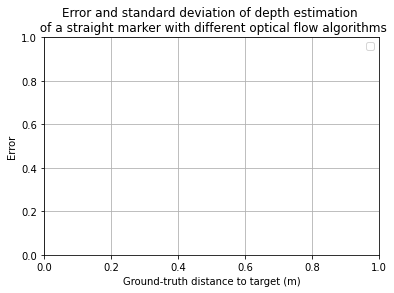

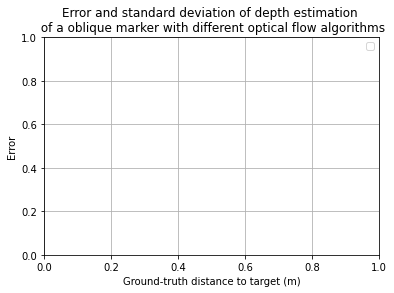

In [ ]:
#%cd /content/drive/MyDrive/Structure-From-Motion-Accurate-Optical-Flow-vs-Active-Vision/


if __name__ == '__main__':

    all_corners = []
    errors = []

    models = get_models()
    trials = get_trials()

    for algo_counter, model in enumerate(models):

        corner_counter = 0
        config_file =  model["config_f"]
        print(config_file)

        checkpoint_file = model["checkpoint_f"]
        print(checkpoint_file)

        mname = model["name"]

        gts = []  # Ground truth distances

        # Build the model from a config file and a checkpoint file
        model = init_model(config_file, checkpoint_file, device='cuda:0')
        for counter, t in enumerate(trials):
            # Ground-truth distances
            t=t[0]
            if counter < 8:
                print(t)
                gts.append(t["gt"])
            if t["trial_type"] == "translational" and t["marker_type"] == "straight":
                print("Translational trial, straight marker")
            elif t["trial_type"] == "translational" and t["marker_type"] == "oblique":
                print("Translational trial, oblique marker")
            elif t["trial_type"] == "gazelock" and t["marker_type"] == "straight":
                print("Gazelock trial,straight marker")
            elif t["trial_type"] == "gazelock" and t["marker_type"] == "oblique":
                print("Gazelock trial, oblique marker")

            rosbagf = "rosbags/{}.bag".format(t["trial"])

            # Convert the required Rosbag topics to dicts
            try:
              camera_infos = rosbag_to_dict(rosbagf, "/camera/color/camera_info")
            except:
              print("Trial does not exist")
              continue
            cam_poses = rosbag_to_dict(rosbagf, "/vrpn_client_node/pandactrl5_EE/pose")

            target_poses = rosbag_to_dict(rosbagf, "/vrpn_client_node/GCVS_largedist_target/pose")

            frames, frame_infos = rosbag_to_dataset(rosbagf, "/camera/color/image_raw/compressed",
                                                    "datasets/" + t["trial_type"] + "_" + t["marker_type"] + "_" + str(
                                                        t["gt"]) + "m")

            t_vels, r_vels, stime = rosbag_to_vel("./rosbags/{}.bag".format(t["trial"]), ['/tf', '/tf_static'],
                                                  "/franka_state_controller/franka_states")

            frame_infos, frames = find_match(stime, frame_infos, frames)
            # Compute fps
            stamp1 = rospy.Time(secs=frame_infos[0]["header"]["stamp"]["secs"],
                                nsecs=frame_infos[0]["header"]["stamp"]["nsecs"])
            stamp2 = rospy.Time(secs=frame_infos[2]["header"]["stamp"]["secs"],
                                nsecs=frame_infos[2]["header"]["stamp"]["nsecs"])
            duration = (stamp2 - stamp1).to_sec()
            fps = 1 / duration
            camera_matrix = np.array(camera_infos[i]["K"]).reshape(3, 3)
            distortion_coefficients = np.array(camera_infos[i]["D"])
            focal_length = (camera_matrix[0][0] + camera_matrix[1][1]) / 2

            Z_mcenters = []  # Array for the depth of centers of the marks
            avg_depths = []  # Array for the average depth of the marks
            avg_depths_mixed = []  # Array for the average depth of the marks

            display_flow = False  # Whether or not to display the flow
            display_marker = False  # Whether or not to display the flow

            last_corners = np.array([])

            start_time = time.time()

            for i in range(240):  # 240 was picked to be fair between trials since they contain different numbers of
                # Calling only indices that allign with the poses (there are half as many poses as there are frames)
                img1 = frames[i * 2]
                img2 = frames[(i + 1) * 2]

                # Optical flow inference
                flow = inference(model, img1, img2, fps, display_flow, t, i)
                mflow = marker_flow(corners ,flow ,t["trial_type"] ,img1.shape) # (pixel/s)


                # Corner detection
                if algo_counter == 0:
                    corners, succ = corner_detection(img1, img2, last_corners, i)
                    all_corners.append(corners)
                    last_corners = corners
                    if succ == False:
                        continue
                else:
                    corner_counter += 1
                    if len(all_corners[corner_counter]) == 0:
                        print("Iteration {} skipped due to missing corner".format(i))
                        continue
                    else:
                        corners = all_corners[corner_counter]

                avg_depth, avg_depth_mixed = depth_estimation(i, mflow, corners, t_vels, r_vels, focal_length,
                                                              img2.shape, t["trial_type"])
                if avg_depth_mixed > 0:
                    avg_depths_mixed.append(abs(avg_depth_mixed))
                if avg_depth > 0:
                    avg_depths.append(abs(avg_depth))

            # Finished one trial
            avg_depths = iqr(1.0, avg_depths)
            trial_depth = sum(avg_depths) / len(avg_depths)
            trial_error = abs(trial_depth - t["gt"])

            avg_depths_mixed = iqr(1.0, avg_depths_mixed)
            trial_depth_mixed = sum(avg_depths_mixed) / len(avg_depths_mixed)
            trial_error_mixed = abs(trial_depth_mixed - t["gt"])

            runtime = (time.time() - start_time)
            error_dict = {'gt': t["gt"],
                          'marker_type': t["marker_type"],
                          'trial_type': t["trial_type"],
                          'mname': mname,
                          'error': round(trial_error, 3),
                          'stdev': np.std(avg_depths) / 8,
                          'error_mixed': round(trial_error_mixed, 3),
                          'stdev_mixed': np.std(avg_depths_mixed) / 8,
                          'runtime': runtime}
            errors.append(error_dict)

    plot_all(gts, errors)


